In [1]:
%matplotlib inline
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter

In [8]:
TICKER = 'QQQ'
START_DATE = '2014-07-01' # Stock data start date
END_DATE = '2024-08-05' # Stock data end date

In [9]:
stockPx = yf.download(TICKER, START_DATE, END_DATE)

[*********************100%%**********************]  1 of 1 completed


In [10]:
print(stockPx)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-07-01   21.670000   21.980000   21.670000   21.969999   16.367384   
2014-07-02   22.360001   22.629999   22.260000   22.379999   16.672836   
2014-07-03   22.580000   22.709999   22.510000   22.709999   16.918676   
2014-07-07   22.820000   22.879999   22.620001   22.670000   16.888878   
2014-07-08   22.610001   22.680000   22.459999   22.570000   16.814381   
...                ...         ...         ...         ...         ...   
2024-07-29  162.679993  163.229996  158.630005  160.009995  160.009995   
2024-07-30  160.440002  161.149994  152.550003  154.539993  154.539993   
2024-07-31  163.770004  166.649994  162.070007  165.800003  165.800003   
2024-08-01  163.479996  167.669998  156.839996  158.179993  158.179993   
2024-08-02  151.250000  153.860001  146.889999  149.860001  149.860001   

              Volume  
Date          

# Visualizations

<Axes: title={'center': 'TSM Daily Prices'}, xlabel='Date', ylabel='Price in USD ($)'>

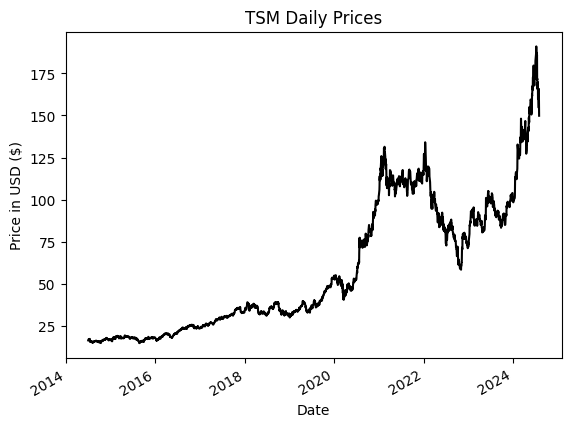

In [21]:
#adjclose has a more accurate rep. of the stock's value
stockPxAj = stockPx['Adj Close']
stockPxAj.plot(title = TICKER + ' Daily Prices', xlabel = 'Date', ylabel = 'Price in USD ($)', color = 'k')

<Axes: title={'center': 'TSM Daily Log Returns'}, xlabel='Date', ylabel='Log Return'>

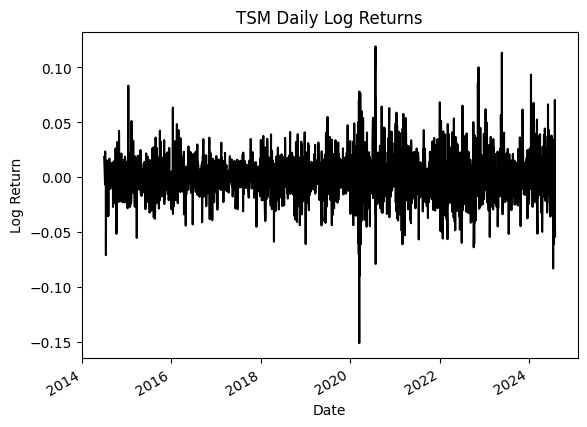

In [12]:
#stock price -> log return
stockLogRet = np.log(stockPxAj).diff().dropna()
# .log(data) calculates log
#.diff() finds the difference between the values for each row and, by default, the previous row
# dropna() drops null values
stockLogRet.plot(title = TICKER + ' Daily Log Returns', xlabel = 'Date', ylabel = 'Log Return', color = 'k')

In [15]:
TICKER1 = 'NVDA' # Enter the stock 1 ticker here
TICKER2 = 'TSM' # Enter the stock 2 ticker here
TAU = 5          # Enter duration of data you want from Yahoo Finance

[*********************100%%**********************]  2 of 2 completed


Text(0.5, 1.0, 'Scatter Plot NVDA vs TSM')

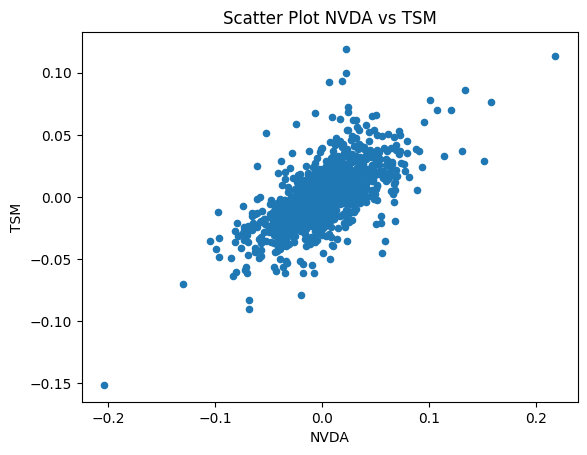

In [16]:
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date

stockPxPair = yf.download([TICKER1, TICKER2], START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance

# converting prices to log returns and removing NaN values
stockLogRetPair = np.log(stockPxPair).diff().dropna()
stockLogRetPair.plot.scatter(x=TICKER1, y=TICKER2)
plt.title('Scatter Plot ' + TICKER1 + ' vs ' + TICKER2)

In [17]:
TICKER3 = 'NVDA' # Enter the stock 1 ticker here
TICKER4 = 'NEE' # Enter the stock 2 ticker here
TAU = 5          # Enter duration of data you want from Yahoo Finance

[*********************100%%**********************]  2 of 2 completed


Text(0.5, 1.0, 'Scatter Plot NVDA vs NEE')

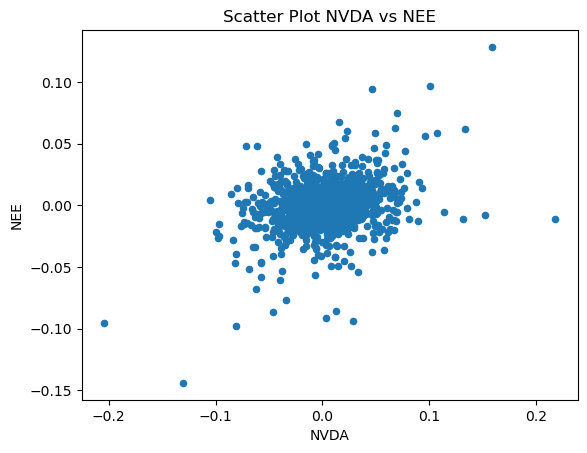

In [33]:
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date

stockPxPair = yf.download([TICKER3, TICKER4], START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance

# converting prices to log returns and removing NaN values
stockLogRetPair = np.log(stockPxPair).diff().dropna()
stockLogRetPair.plot.scatter(x=TICKER3, y=TICKER4)
plt.title('Scatter Plot ' + TICKER3 + ' vs ' + TICKER4)

[*********************100%%**********************]  19 of 19 completed


Text(0.5, 1.0, 'Correlations Between Stock Log Returns')

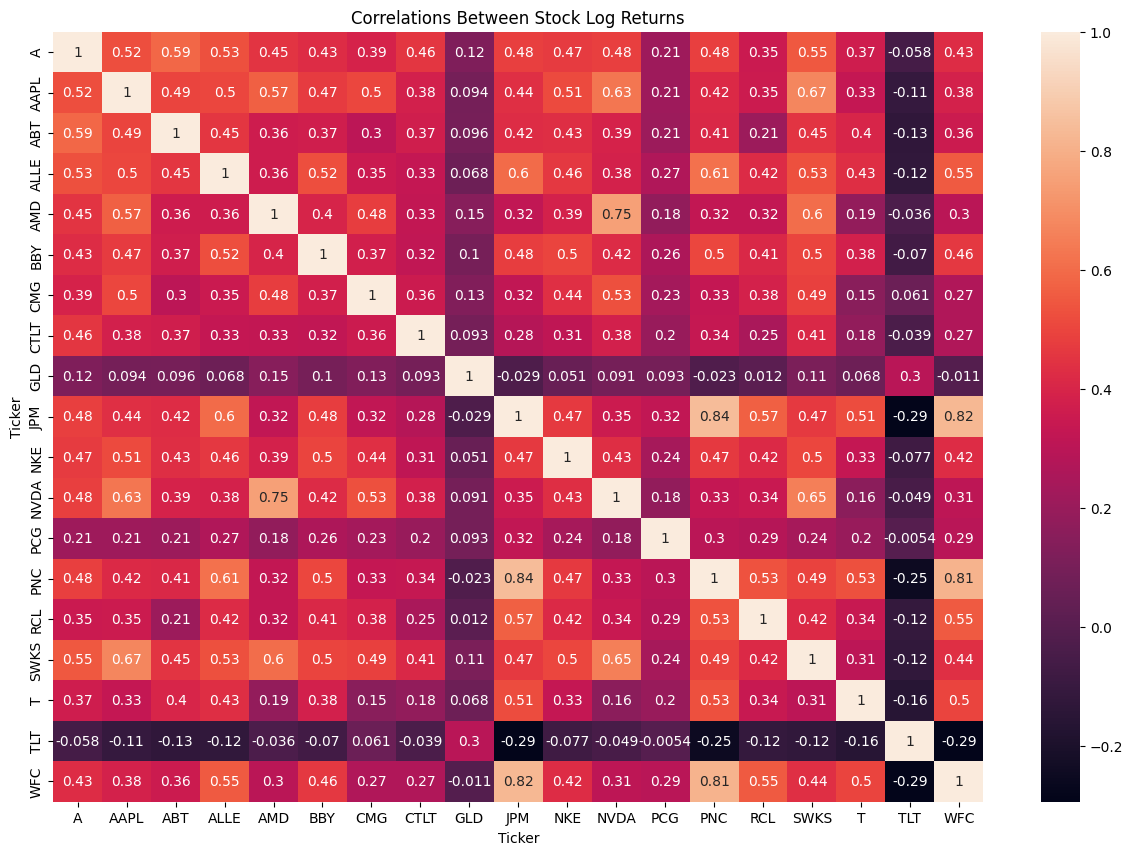

In [8]:
symbolList = ['NVDA', 'GLD', 'JPM', 'WFC', 'NKE', 'CMG', 'BBY', 'T', 'TLT', 'A', 'PNC', 'ABT', 'ALLE','SWKS','AMD', 'RCL', 'CTLT', 'AAPL','PCG']
TAU = 5
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date

stockPxList = yf.download(symbolList, START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance

# converting prices to log returns and removing NaN values
stockLogRetList = np.log(stockPxList).diff().dropna()
# visualizing correlation heatmap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(stockLogRetList.corr(),annot=True)
plt.title("Correlations Between Stock Log Returns")

In [47]:
stockLogRet.describe()

count    2515.000000
mean        0.002236
std         0.029702
min        -0.207711
25%        -0.011738
50%         0.002409
75%         0.016910
max         0.260876
Name: Adj Close, dtype: float64

Text(0.5, 0, 'Log Return')

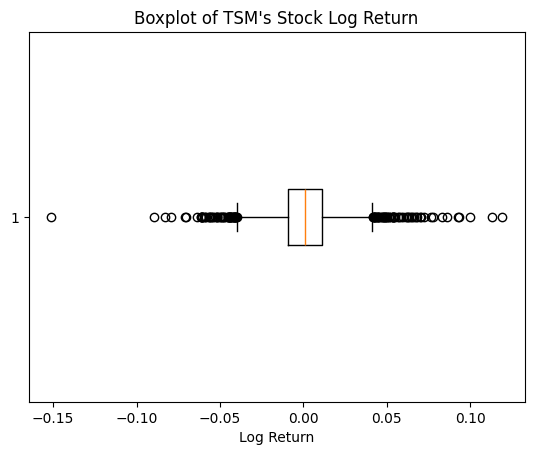

In [18]:
plt.boxplot(stockLogRet, vert=False) # stock log returns are extracted above when visualizing time plots
plt.title("Boxplot of "+ TICKER + "'s Stock Log Return")
plt.xlabel("Log Return")

Text(0, 0.5, 'Density')

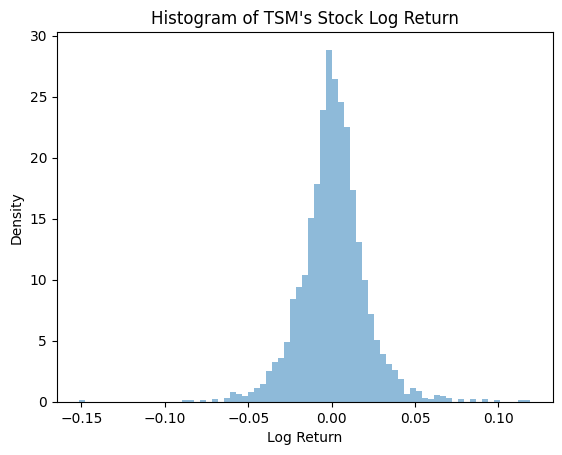

In [19]:
_, bins, _= plt.hist(stockLogRet, bins=75, density=1, alpha=0.5)
plt.title("Histogram of " + TICKER + "'s Stock Log Return")
plt.xlabel("Log Return")
plt.ylabel("Density")

#  Normality Tests

In [20]:
#Shapiro-Wilk Test
shapiro_test = stats.shapiro(stockLogRet)
shapiro_test.pvalue

4.879111321580429e-26

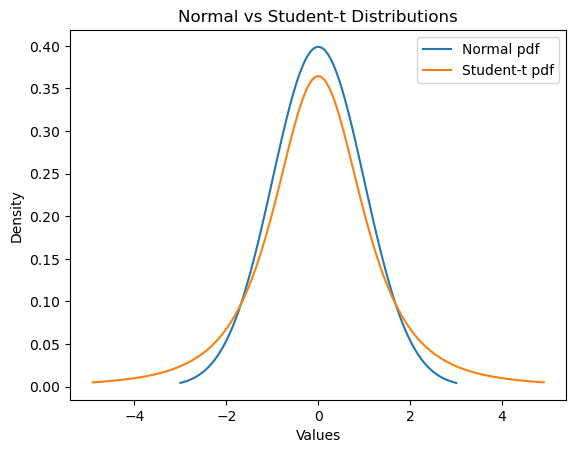

In [53]:
#Jarque-Bera Test

from scipy.stats import norm, t
mu = 0  # mean of the distriubution = 0
sigma = 1 # standard deviation =1

#linspace(start, stop, num) --> generates num evenly spaced samples between start and stop
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#3 sd from the mean => covers 99.7% of points

plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Normal pdf')
#.pdf = probability density function

df = 2.74 #why 2.74? how is it calculated?
mean, var, skew, kurt = t.stats(df, moments='mvsk')

x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), 100)
#.ppf(quantile, df) = percent point function   ^this creates a range that covers 98% (0.99-0.01) of the t-distribution
#and generates 100 points within this range


plt.plot(x, t.pdf(x, df), label='Student-t pdf')
plt.title("Normal vs Student-t Distributions")
plt.xlabel("Values"); plt.ylabel("Density")
plt.legend()

In [54]:
jarque_bera_test = stats.jarque_bera(stockLogRet)
jarque_bera_test.pvalue

0.0

# Pre-Processing Data

In [ ]:
val - mean/sd